In [3]:
# Relative path
import sys
from mlpython.fio import load_object, save_object  
import xarray as xr

# May not need to do this again
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'
import pandas as pd
import tqdm as tqdm
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# Plotting style
plt.style.use('../grl.mplstyle')

from helper import compute_dEdt, compute_waves, compute_Phi
from mlpython.plot import set_letters

from helper import spectrum_format, energy_format, lambdac_format

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Seperate

In [5]:
#### Was used to compute colors #####
# tbins=[100,120,140,160,180]
# DIR2 = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
# sigma_list = []
# labels = ['C1','C2','C3','C4_rand4','C5']
# for label in labels:
#     # Read in the time series of eta and hist of breakers
#     filename = DIR2 + label + '/series.nc'
#     ds = xr.open_dataset(filename, engine='h5netcdf')
#     sigmas, Hss = compute_waves(ds, tbins) # Compute sigma and Hs
#     sigma_aver = np.array(sigmas).mean(axis=0)
#     sigma_list.append(sigma_aver)

C1
C2
C3
C4_rand4
C5


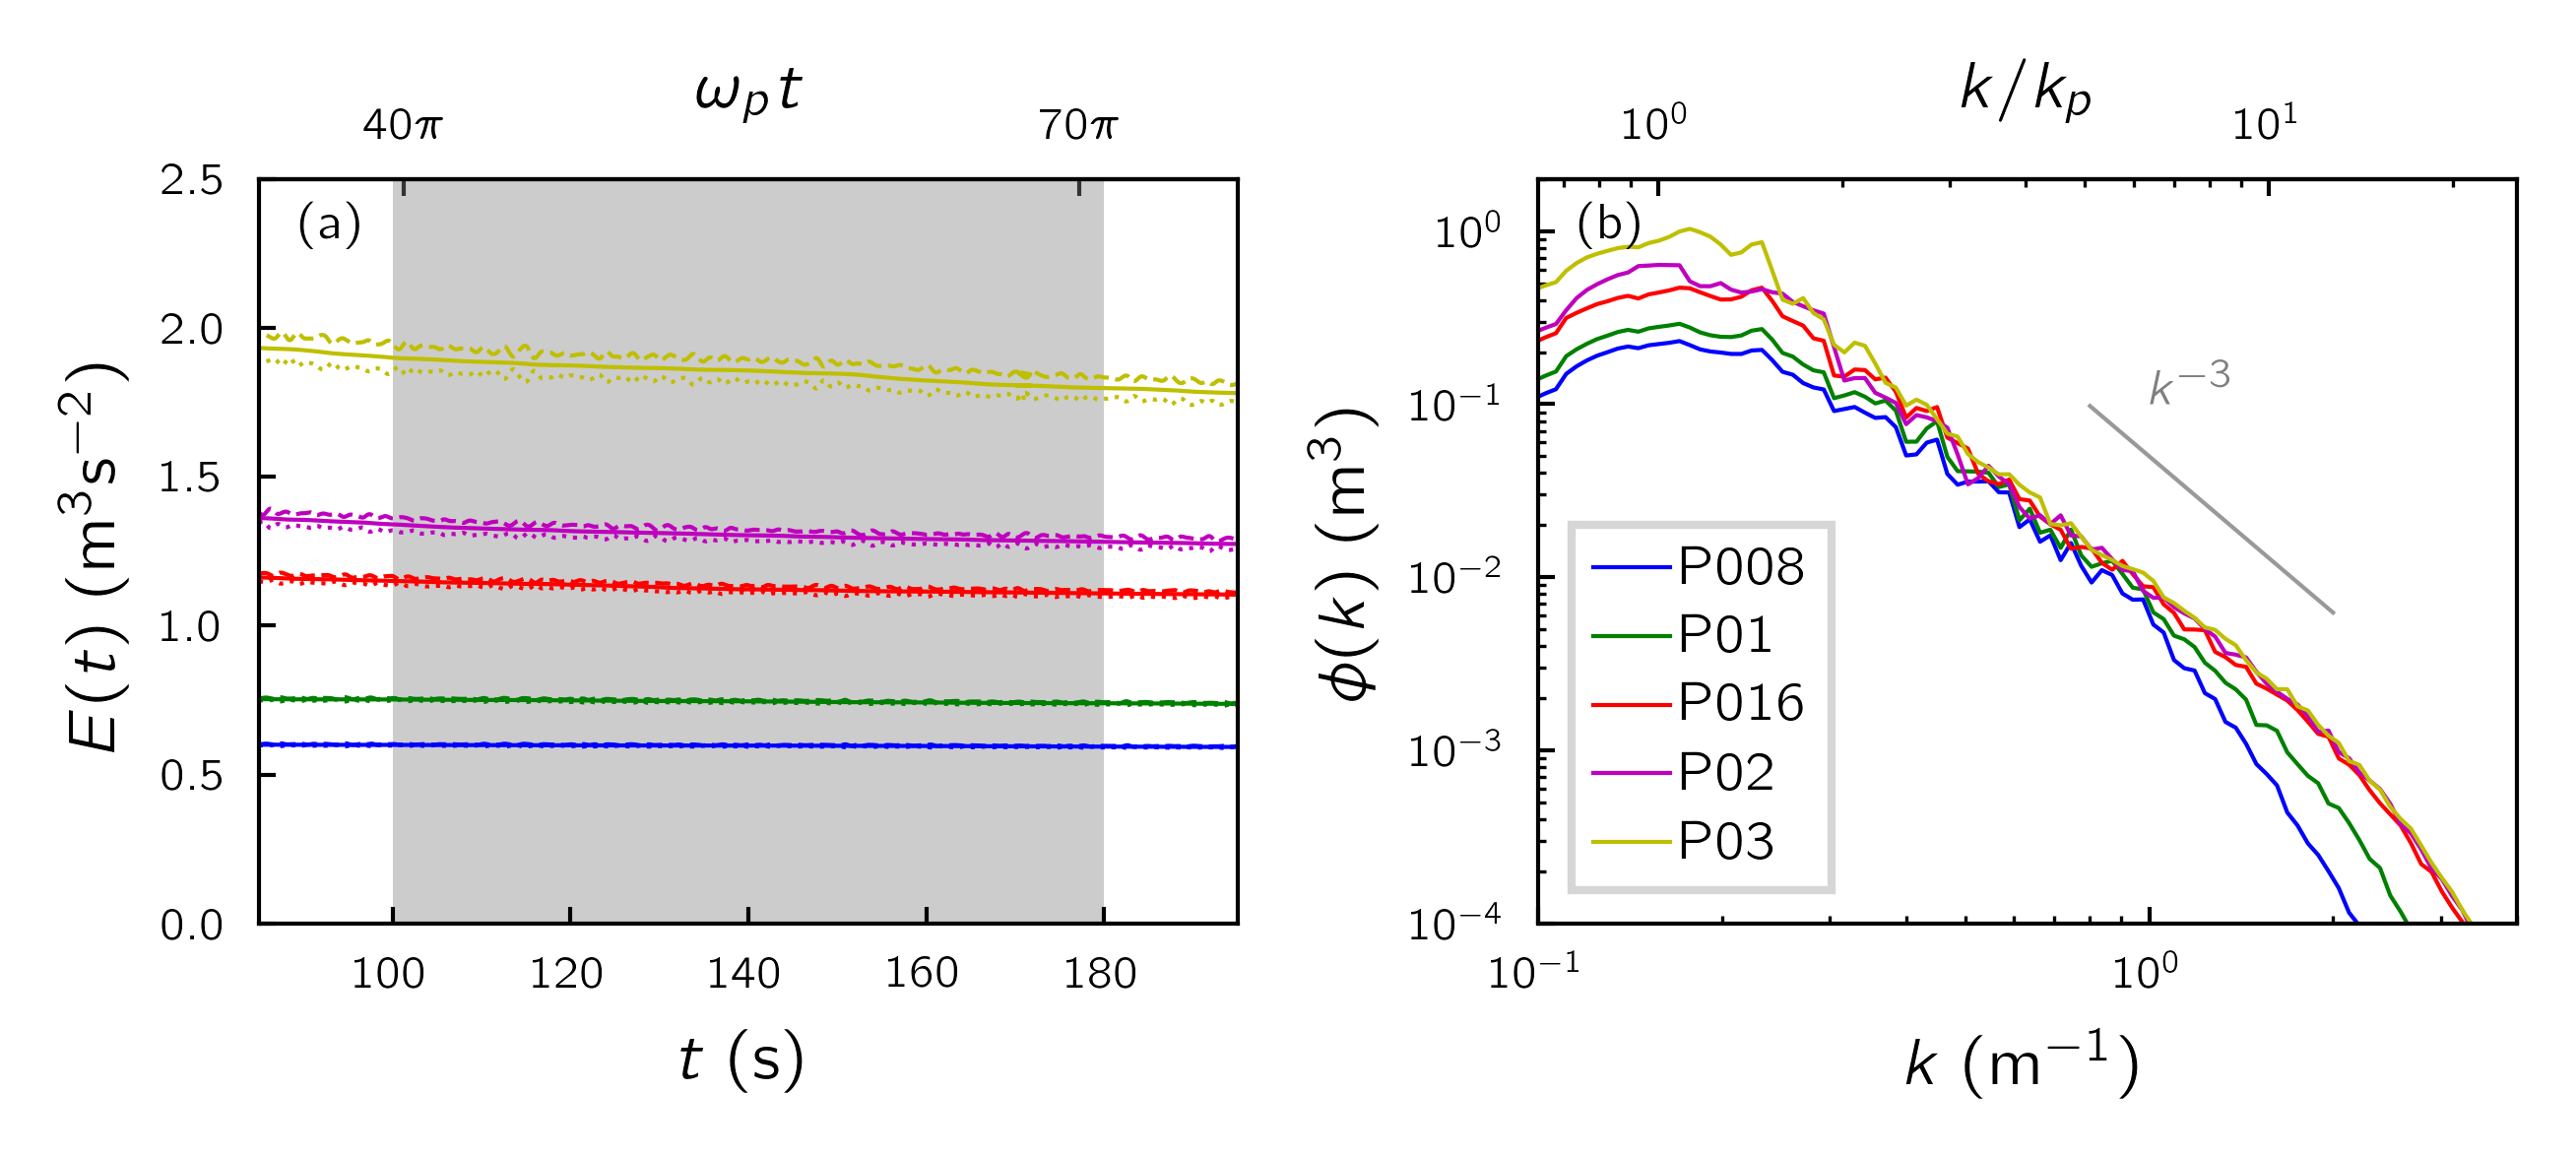

In [5]:
#### Define the time windows and some shared meta data ####
tbins=[100,120,140,160,180]
kp = 2*np.pi/40  # Note: kp is the same for all cases plotted here but might need to be changed
cp = (9.8/kp)**0.5
omegap = (kp*9.8)**0.5 # shared by all cases
L0 = 200

#### Define some plotting parameters ####
fig, axes = plt.subplots(1, 2, figsize=[4.4,2])
window_size = 1 # energy moving average
lines = ['-o','-x','-s','-^'] # lines for different time windows
DIR1 = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
DIR2 = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
labels = ['C1','C2','C3','C4_rand4','C5']
colors = ['C0','C1','C2','C4','C5']
legends = ['P008', 'P01', 'P016', 'P02', 'P03']

#### Loop through cases and plot ####
for i, label in enumerate(labels):
    print (label)
    
    # Subplot 1
    ax = axes[0]
    filename = DIR2 + label + '/energy.dat'
    energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
    windows = energy.rolling(window_size); moving_averages = windows.mean()    
    # cc = mpl.colormaps['Oranges']((sigma_list[i]-0.05)/(0.2-0.05))
    ax.plot(moving_averages.t, 2*moving_averages.ke/L0**2, '--', c=colors[i])
    ax.plot(moving_averages.t, 2*moving_averages.gpe/L0**2, ':', c=colors[i])
    ax.plot(energy.t, (energy.ke+energy.gpe)/L0**2, lw=0.5, c=colors[i], label=legends[i])
    
    # Subplot 2: Plot energy
    ax = axes[1]
    filename = DIR1 + 'compilation/dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    # cc = mpl.colormaps['Oranges']((diss.sigma.values.mean(axis=0)-0.05)/(0.2-0.05))
    ax.plot(diss.kbins, diss.F.mean(axis=0), c=colors[i], lw=0.5, label=legends[i])

energy_format(axes[0], omegap)
spectrum_format(axes[1], kp)

set_letters(x=0.04, y=0.92, fontsize=6)
plt.tight_layout()
plt.legend()
plt.savefig('./plots/energy_spectrum.pdf', bbox_inches='tight')


C1
C2
C3
C4_rand4
C5


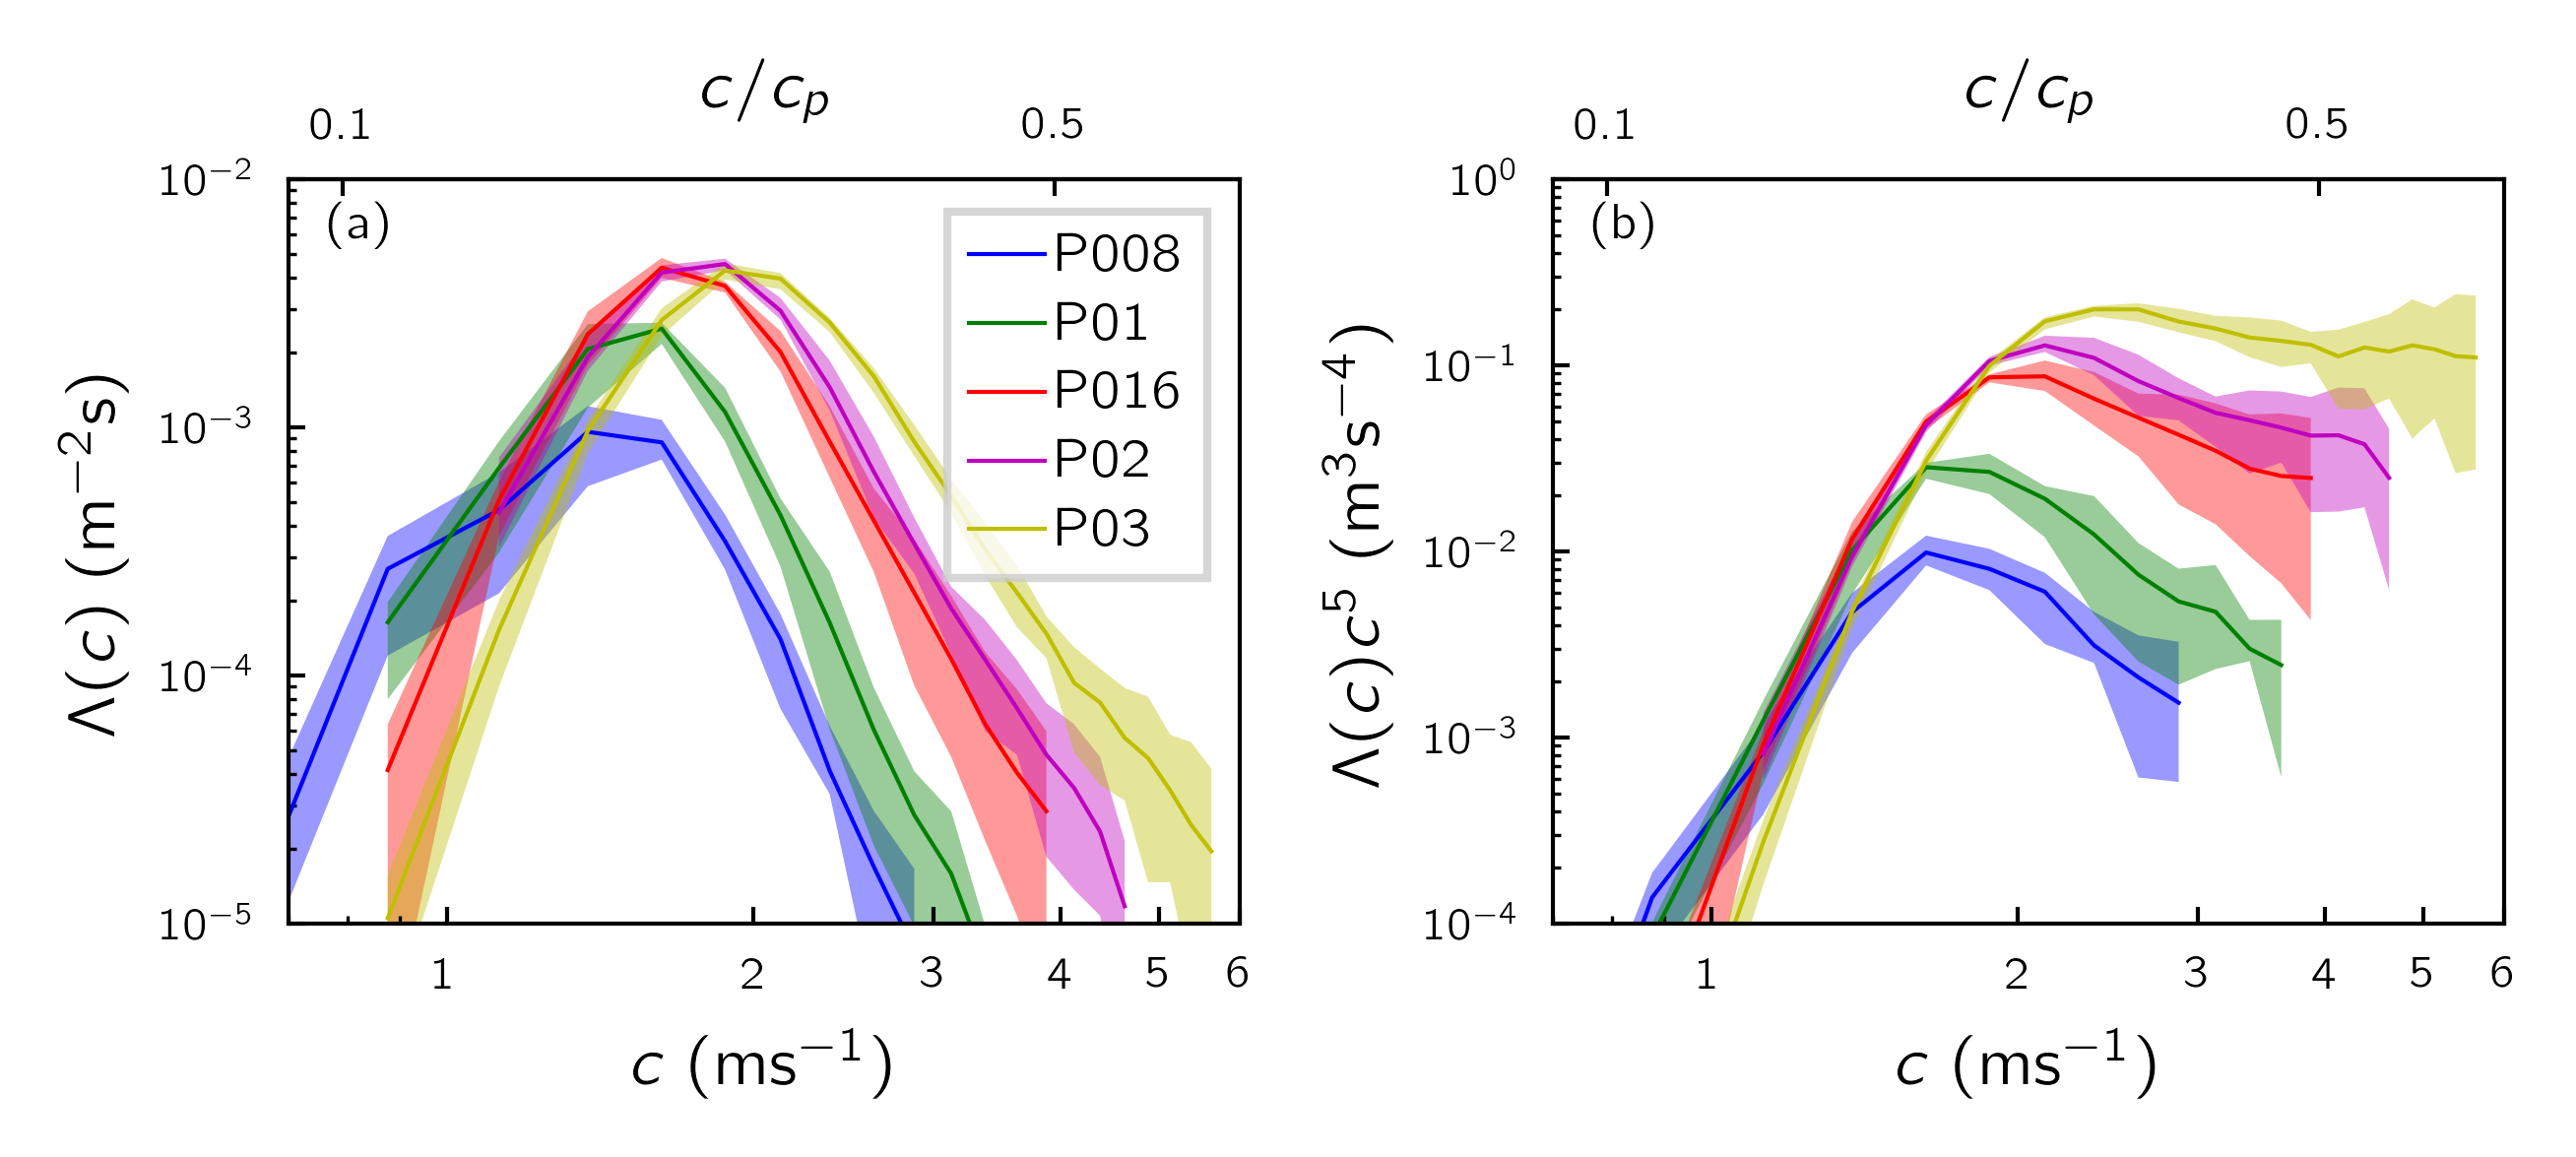

In [8]:
#### Define the time windows and some shared meta data ####
tbins=[100,120,140,160,180]
kp = 2*np.pi/40  # Note: kp is the same for all cases plotted here but might need to be changed
cp = (9.8/kp)**0.5
omegap = (kp*9.8)**0.5 # shared by all cases
L0 = 200

#### Define some plotting parameters ####
fig, axes = plt.subplots(1, 2, figsize=[4.4, 2])
window_size = 1 # energy moving average
lines = ['-o','-x','-s','-^'] # lines for different time windows
DIR1 = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
DIR2 = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
labels = ['C1','C2','C3','C4_rand4','C5']
colors = ['C0','C1','C2','C4','C5']
legends = ['P008', 'P01', 'P016', 'P02', 'P03']

#### Loop through cases and plot ####
for i, label in enumerate(labels):
    print (label)
    
    filename = DIR2 + label + '/breaking_hist.nc'
    hist = xr.open_dataset(filename, engine='h5netcdf')
    hist['hist_norm'] = hist.hist/2**10/200/(hist.c[2] - hist.c[1])
    hist['fifth'] = hist.hist_norm * hist.c**5
    bins = [100, 120, 140, 160, 180]  # Define bin edges
    grouped = hist.groupby_bins('t', bins=bins).mean()
    
    # Subplot 3: Plot breaking over time windows    
    ax = axes[0]
    cond = (grouped.hist.max(dim='t_bins') - grouped.hist.min(dim='t_bins'))/grouped.hist.mean(dim='t_bins') < 2
    ax.plot(hist.c, grouped.hist_norm.mean(dim='t_bins').where(cond), color=colors[i],
            label=legends[i])
    ax.fill_between(hist.c, grouped.hist_norm.max(dim='t_bins').where(cond), 
                    grouped.hist_norm.min(dim='t_bins').where(cond), 
                    color=colors[i], alpha=0.4, edgecolor='none')
    
    # Subplot 4: Plot fifth moment
    ax = axes[1]
    cond = (grouped.fifth.max(dim='t_bins') - grouped.fifth.min(dim='t_bins'))/grouped.fifth.mean(dim='t_bins') < 2
    ax.plot(hist.c.where(cond), grouped.fifth.mean(dim='t_bins').where(cond), color=colors[i],
            label=legends[i])
    ax.fill_between(hist.c.where(cond), grouped.fifth.max(dim='t_bins').where(cond), 
                    grouped.fifth.min(dim='t_bins').where(cond), 
                    color=colors[i], alpha=0.4, edgecolor='none')

lambdac_format(axes[0], cp)
lambdac_format(axes[1], cp)   

axes[0].set_ylim([10**(-5),10**(-2)])
axes[0].set_ylabel(r'$\Lambda(c) \;\mathrm{(m^{-2}s)}$')
axes[1].set_ylim([10**(-4),10**(0)])
axes[1].set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')

set_letters(x=0.04, y=0.92, fontsize=6)
plt.tight_layout(); axes[0].legend()
plt.savefig('./plots/lambdac_fifth.pdf', bbox_inches='tight')


### Together

In [ ]:
#### Define the time windows and some shared meta data ####
tbins=[100,120,140,160,180]
kp = 2*np.pi/40  # Note: kp is the same for all cases plotted here but might need to be changed
cp = (9.8/kp)**0.5
omegap = (kp*9.8)**0.5 # shared by all cases
L0 = 200

#### Define some plotting parameters ####
fig, axes = plt.subplots(2,2,figsize=[4.4,4])
window_size = 1 # energy moving average
lines = ['-o','-x','-s','-^'] # lines for different time windows
DIR1 = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
DIR2 = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
labels = ['C1','C2','C3','C4_rand4','C5']
colors = ['C0','C1','C2','C4','C5']

#### Loop through cases and plot ####
for i, label in enumerate(labels):
    print (label)
    
    # Subplot 1
    ax = axes[0,0]
    filename = DIR1 + 'compilation/dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    # cc = mpl.colormaps['Oranges']((diss.sigma.values.mean(axis=0)-0.05)/(0.2-0.05))
    ax.plot(diss.kbins, diss.F.mean(axis=0), c=colors[i], lw=0.5)

    # Subplot 2: Plot energy
    ax = axes[0,1]
    filename = DIR2 + label + '/energy.dat'
    energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
    windows = energy.rolling(window_size); moving_averages = windows.mean()    
    cc = mpl.colormaps['Oranges']((sigma_list[i]-0.05)/(0.2-0.05))
    ax.plot(moving_averages.t, 2*moving_averages.ke/L0**2, '--', c=colors[i])
    ax.plot(moving_averages.t, 2*moving_averages.gpe/L0**2, ':', c=colors[i])
    ax.plot(energy.t, (energy.ke+energy.gpe)/L0**2, lw=0.5, c=colors[i])
    
    filename = DIR2 + label + '/breaking_hist.nc'
    hist = xr.open_dataset(filename, engine='h5netcdf')
    hist['hist_norm'] = hist.hist/2**10/200/(hist.c[2] - hist.c[1])
    hist['fifth'] = hist.hist_norm * hist.c**5
    bins = [100, 120, 140, 160, 180]  # Define bin edges
    grouped = hist.groupby_bins('t', bins=bins).mean()
    
    # Subplot 3: Plot breaking over time windows    
    ax = axes[1,0]
    cond = (grouped.hist.max(dim='t_bins') - grouped.hist.min(dim='t_bins'))/grouped.hist.mean(dim='t_bins') < 2
    ax.plot(hist.c, grouped.hist_norm.mean(dim='t_bins').where(cond), color=colors[i])
    ax.fill_between(hist.c, grouped.hist_norm.max(dim='t_bins').where(cond), 
                    grouped.hist_norm.min(dim='t_bins').where(cond), 
                    color=colors[i], alpha=0.4, edgecolor='none')
    
    # Subplot 4: Plot fifth moment
    ax = axes[1,1]
    cond = (grouped.fifth.max(dim='t_bins') - grouped.fifth.min(dim='t_bins'))/grouped.fifth.mean(dim='t_bins') < 2
    ax.plot(hist.c.where(cond), grouped.fifth.mean(dim='t_bins').where(cond), color=colors[i])
    ax.fill_between(hist.c.where(cond), grouped.fifth.max(dim='t_bins').where(cond), 
                    grouped.fifth.min(dim='t_bins').where(cond), 
                    color=colors[i], alpha=0.4, edgecolor='none')

spectrum_format(axes[0,0], kp)
energy_format(axes[0,1], omegap)
lambdac_format(axes[1,0], cp)
lambdac_format(axes[1,1], cp)   

axes[1,0].set_ylim([10**(-5),10**(-2)])
axes[1,0].set_ylabel(r'$\Lambda(c) \;\mathrm{(m^{-2}s)}$')
axes[1,1].set_ylim([10**(-4),10**(0)])
axes[1,1].set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')

set_letters(x=0.04, y=0.92, fontsize=6)
plt.tight_layout()
plt.savefig('./plots/fig2.pdf', bbox_inches='tight')
